In the Business and Data Understanding part, we already discussed that calendar dataset might be a great source to answer question like what are the busiest times of the year to visit Seattle? By how much do prices spike?

In [62]:
# import necessary library and calendar dataset
import numpy as np
import pandas as pd

# import matplotlib - library to uild the plots
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# read calendar dataset and show first few rows
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [65]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [66]:
# check how many missing values in each column
(calendar.shape[0]-calendar.count())/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

From above you can see that check only price field has missing values, and it is about 32.9%. So first we need to take care of NA's in the price field. What must be causing these NA's

In [68]:
# for the missing values in price column, find corresponding value in available column?
calendar[calendar['price'].isnull()==True]['available'].value_counts()

0    459028
Name: available, dtype: int64

From above we can say that missing prices are caused by unavailability.

Lets replace the t in 'available' column with 1, and f with 0, to calculate the percentage of available listings on each day,

In [67]:
# transform the available column : t → 1， f → 0
calendar.loc[calendar['available']=='t','available']=1
calendar.loc[calendar['available']=='f','available']=0

# calculate on each date, how much percent of listings still available
availability=pd.pivot_table(calendar,index=['date'],values=['available'],aggfunc=np.sum)
# we know there are 3818 listings in total, so the percent of available listings= number of available listings/total amount of listings
availability['available_percent']=availability['available']/3818
availability.head()

,available,available_percent
date,,
2016-01-04,1735,0.454426
2016-01-05,1867,0.488999
2016-01-06,1826,0.478261
2016-01-07,1776,0.465165
2016-01-08,1782,0.466737


Lats draw a line graph, X axis representing the date and Y axis as available_percent to show the percent of listings in Seattle over the year.

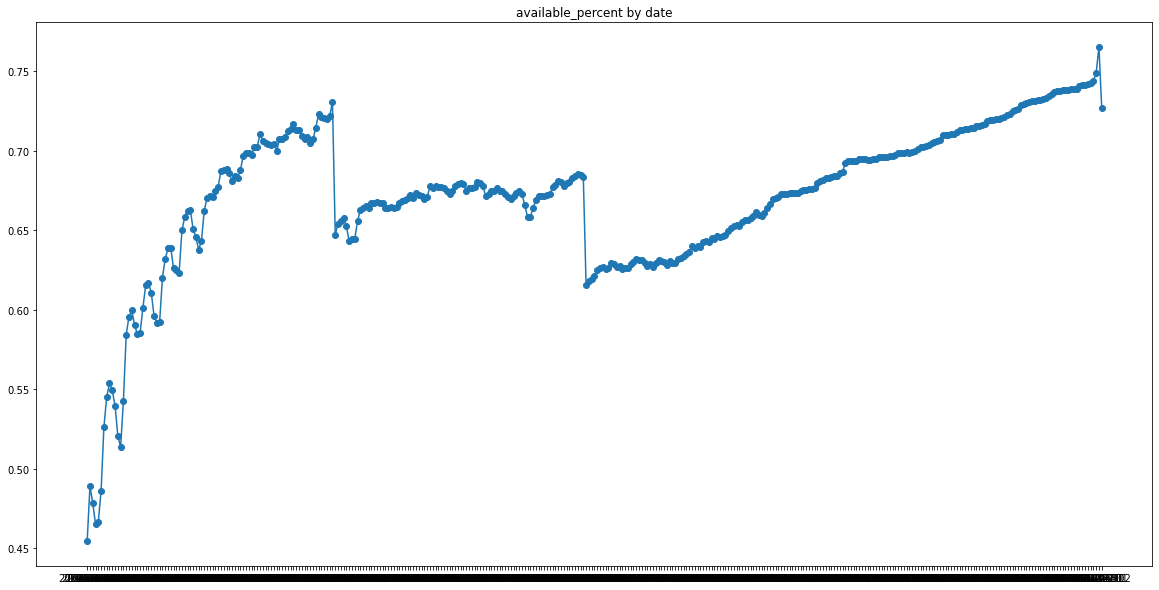

In [69]:
# plot the available_percent by date
plt.figure(figsize=(20,10))
plt.plot(availability['available_percent'], 'o-')
plt.title('available_percent by date')
plt.show()

Since there are too many dates in this dataset, so we can't clearly see the date information in x axis. So I decided to show available_percent by week. X axis is the week number and Y axis is the average available_percent in that week.

In [70]:
#generate a new column: date
availability['date']=availability.index

# generate a new column: week
from datetime import datetime
availability['date'] = availability['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
availability['week']=availability['date'].apply(lambda x:x.isocalendar()[1])

In [71]:
# calculate the average available_persent of each week
availability_w=pd.pivot_table(availability,index=['week'],values=['available_percent'],aggfunc=np.mean)

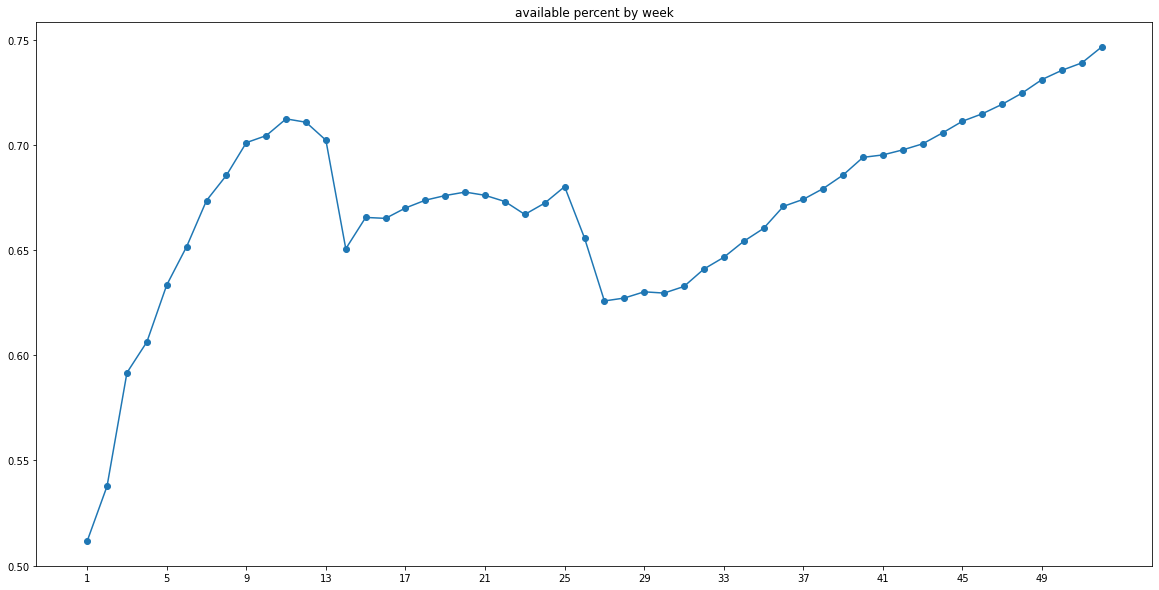

In [72]:
# plot the available_persent by week
plt.figure(figsize=(20,10))
plt.plot(availability_w.index,availability_w['available_percent'], 'o-')
plt.xticks(np.arange(1, 52, step=4))
plt.title('available percent by week')
plt.show()

From the above graph, we can observe that week1-week4(January) is the busiest season to visit Seattle because the avaiable persent level is lowest in the whole year.The second busiest season might be week 27-week30.